Analysis of Employee exit Survey, the goal of this analysis is to find out whether 

1 Employees who only worked for the institutes for a short period of time are resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2 Younger employees are resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 150

In [2]:
dete_df = pd.read_csv("dete.csv", encoding="UTF-8", na_values='Not Stated')
tafe_df = pd.read_csv("tafe.csv", encoding="UTF-8", na_values='Not Stated')

In [3]:
dete_df.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [4]:
dete_df

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,Aug-12,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),Aug-12,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),May-12,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,May-12,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,May-12,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,Feb-14,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,SA,N,D,D,A,N,N,D,A,N,A,A,N,SA,SA,N,D,A,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,Jan-14,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,A,SA,D,D,D,A,A,N,A,N,A,A,N,A,N,N,A,A,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,Jan-14,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,A,A,A,A,A,D,N,A,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,Dec-13,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,A,D,D,A,SD,SD,SD,A,D,SD,SD,D,A,A,N,N,N,SD,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [5]:
#droping of columns that are not important to our analysis
dete = dete_df.drop(dete_df.columns[28:49], axis=1)

In [6]:
dete.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,Aug-12,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),Aug-12,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),May-12,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,May-12,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,May-12,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
detes = dete.drop(dete.columns[29:], axis=1)

In [8]:
detes

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender
0,1,Ill Health Retirement,Aug-12,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male
1,2,Voluntary Early Retirement (VER),Aug-12,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male
2,3,Voluntary Early Retirement (VER),May-12,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male
3,4,Resignation-Other reasons,May-12,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female
4,5,Age Retirement,May-12,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,Feb-14,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,Female
818,820,Age Retirement,Jan-14,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male
819,821,Resignation-Move overseas/interstate,Jan-14,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,Female
820,822,Ill Health Retirement,Dec-13,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,Female


In [9]:
tafe_df

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [10]:
tafe = tafe_df.drop(tafe_df.columns[17:66], axis=1)

In [11]:
tafe

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.340000e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),01-Feb,01-Feb
1,6.340000e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.340000e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.340000e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.340000e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),03-Apr,03-Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350000e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),01-Feb,01-Feb
698,6.350000e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350000e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),05-Jun,01-Feb
700,6.350000e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,41 45,Temporary Full-time,Professional Officer (PO),01-Feb,01-Feb


In [12]:
detes.columns = detes.columns.str.strip().str.replace("/", " ").str.replace(" ", "_").str.lower()
detes.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity_family', 'relocation', 'study_travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender'],
      dtype='object')

In [13]:
tafe.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [14]:
#updating column names of both dataframe to match each other
maping = {"Contributing Factors. Career Move - Public Sector ": "career_move_to_public_sector", "Contributing Factors. Career Move - Private Sector ": "career_move_to_private_sector",
         "Contributing Factors. Interpersonal Conflict": "interpersonal_conflicts", "Contributing Factors. Job Dissatisfaction": "job_dissatisfaction",
         "Contributing Factors. Ill Health": "ill_health", "Contributing Factors. Maternity/Family": "maternity_family",
         }

In [15]:
tafe = tafe.rename(maping, axis=1)

In [16]:
tafe.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment', 'career_move_to_public_sector',
       'career_move_to_private_sector',
       'Contributing Factors. Career Move - Self-employment', 'ill_health',
       'maternity_family', 'Contributing Factors. Dissatisfaction',
       'job_dissatisfaction', 'interpersonal_conflicts',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

In [17]:
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [19]:
tafe = tafe.rename(mapping, axis=1)

In [20]:
tafe

,id,Institute,WorkArea,cease_date,separationtype,career_move_to_public_sector,career_move_to_private_sector,Contributing Factors. Career Move - Self-employment,ill_health,maternity_family,Contributing Factors. Dissatisfaction,job_dissatisfaction,interpersonal_conflicts,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.340000e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),01-Feb,01-Feb
1,6.340000e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.340000e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.340000e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.340000e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),03-Apr,03-Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350000e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),01-Feb,01-Feb
698,6.350000e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350000e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),05-Jun,01-Feb
700,6.350000e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,41 45,Temporary Full-time,Professional Officer (PO),01-Feb,01-Feb


In [21]:
mapit = {"Contributing Factors. Career Move - Self-employment": "self_employment", "Contributing Factors. Dissatisfaction": "dissatisfaction",
        "Contributing Factors. Study": "study", "Contributing Factors. Travel": "travel", "Contributing Factors. Other": "other",
        "Contributing Factors. NONE": "none"}

In [22]:
tafe = tafe.rename(mapit, axis=1)

In [24]:
detes = detes.rename(m, axis=1)

In [23]:
m = {"dissatisfaction_with_the_department": "dissatisfaction"}

In [25]:
tafe.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'self_employment', 'ill_health', 'maternity_family', 'dissatisfaction',
       'job_dissatisfaction', 'interpersonal_conflicts', 'study', 'travel',
       'other', 'none', 'gender', 'age', 'employment_status', 'position',
       'institute_service', 'role_service'],
      dtype='object')

In [26]:
detes.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'maternity_family', 'relocation',
       'study_travel', 'ill_health', 'traumatic_incident', 'work_life_balance',
       'workload', 'none_of_the_above', 'gender'],
      dtype='object')

In [27]:
tafe["institute"] = "tafe"
detes["institute"] = "dete"

In [28]:
#calculating the number of years spent in the institute for dete_df by carrying out subtraction
#the tafe_df has the column already
detes["cease_date"].value_counts(dropna=False)

2012      344
2013      200
Jan-14     43
Dec-13     40
NaN        34
Sep-13     34
Jun-13     27
Jul-13     22
Oct-13     20
Nov-13     16
Aug-13     12
May-13      7
May-12      6
Apr-14      2
Jul-14      2
Aug-12      2
Apr-13      2
Feb-14      2
Nov-12      1
Sep-10      1
2010        1
2014        1
Jul-12      1
Sep-14      1
Jul-06      1
Name: cease_date, dtype: int64

In [29]:
detes["cease_date"] = detes["cease_date"].str.split("-").str[-1]

In [30]:
def function(y):
        if len(str(y)) == 2:
            return ("20" + y)
        else:
            return y
detes["cease_date"].apply(function).value_counts(dropna=False)

2013    380
2012    354
2014     51
NaN      34
2010      2
2006      1
Name: cease_date, dtype: int64

In [31]:
detes["cease_date"] = detes["cease_date"].apply(function)

In [32]:
detes["dete_start_date"].value_counts(dropna=False)

NaN       73
2011.0    40
2007.0    34
2008.0    31
2010.0    27
2012.0    27
2009.0    24
2006.0    23
1970.0    21
2013.0    21
1975.0    21
2005.0    20
1990.0    20
1996.0    19
1999.0    19
2000.0    18
1992.0    18
2004.0    18
1991.0    18
1989.0    17
1976.0    15
2002.0    15
1978.0    15
2003.0    15
1988.0    15
1974.0    14
1980.0    14
1995.0    14
1998.0    14
1997.0    14
1979.0    14
1993.0    13
1986.0    12
1972.0    12
1977.0    11
1971.0    10
2001.0    10
1984.0    10
1969.0    10
1994.0    10
1981.0     9
1983.0     9
1985.0     8
1973.0     8
1987.0     7
1963.0     4
1982.0     4
1968.0     3
1967.0     2
1966.0     1
1965.0     1
Name: dete_start_date, dtype: int64

In [33]:
detes["cease_date"] = detes["cease_date"].astype(float)

In [34]:
b = detes["cease_date"] - detes["dete_start_date"]
b.value_counts(dropna=False)

NaN     103
1.0      36
5.0      34
3.0      31
0.0      31
4.0      28
6.0      27
2.0      23
22.0     22
37.0     21
9.0      20
13.0     18
15.0     18
43.0     17
7.0      17
23.0     17
24.0     16
17.0     16
38.0     15
21.0     15
16.0     15
14.0     14
8.0      14
35.0     14
12.0     14
39.0     14
11.0     13
19.0     13
42.0     13
10.0     13
34.0     12
32.0     12
20.0     12
33.0     11
18.0     11
26.0     11
41.0     11
25.0     10
31.0     10
29.0      8
28.0      8
40.0      8
44.0      7
27.0      7
36.0      7
45.0      5
30.0      4
49.0      3
46.0      1
50.0      1
48.0      1
dtype: int64

In [35]:
detes["institute_service"] = detes["cease_date"] - detes["dete_start_date"]

In [36]:
#combining both data
combined = pd.concat([detes, tafe], axis=0, ignore_index=True)

In [37]:
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity_family,relocation,study_travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,institute,institute_service,Institute,WorkArea,self_employment,study,travel,other,none,age,role_service
0,1.0,Ill Health Retirement,2012.0,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,dete,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Voluntary Early Retirement (VER),2012.0,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,dete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Voluntary Early Retirement (VER),2012.0,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,dete,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,dete,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Age Retirement,2012.0,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,dete,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
combined["separationtype"].value_counts()

Resignation                             340
Age Retirement                          285
Contract Expired                        161
Resignation-Other reasons               150
Retrenchment/ Redundancy                104
Resignation-Other employer               91
Retirement                               82
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Termination                              38
Transfer                                 25
Name: separationtype, dtype: int64

In [39]:
combined['separationtype'] = combined['separationtype'].str.split('-').str[0]

In [40]:
combined["separationtype"].value_counts(dropna=False)

Resignation                         651
Age Retirement                      285
Contract Expired                    161
Retrenchment/ Redundancy            104
Retirement                           82
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Termination                          38
Transfer                             25
NaN                                   1
Name: separationtype, dtype: int64

In [41]:
separate = combined["separationtype"]
separate_bool = separate == "Resignation"
resignation = combined[separate_bool]
resignation.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity_family,relocation,study_travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,institute,institute_service,Institute,WorkArea,self_employment,study,travel,other,none,age,role_service
3,4.0,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,dete,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,dete,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,dete,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,dete,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12.0,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,dete,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
resignation.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity_family,relocation,study_travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,institute,institute_service,Institute,WorkArea,self_employment,study,travel,other,none,age,role_service
3,4.0,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,dete,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,dete,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,dete,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,dete,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12.0,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,dete,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
resignation.head()

In [45]:
#updating columns to just True, False and Nan Values
resignation["job_dissatisfaction"].value_counts(dropna=False)

False                  270
-                      270
Job Dissatisfaction     62
True                    41
NaN                      8
Name: job_dissatisfaction, dtype: int64

In [46]:
def function(ele):
    if ele == "-":
        return False
    elif pd.isnull(ele):
        return np.nan
    elif ele == False:
        return False
    else:
        return True
resignation["job_dissatisfaction"].apply(function).value_counts(dropna=False)

False    540
True     103
NaN        8
Name: job_dissatisfaction, dtype: int64

In [47]:
resignation["job_dissatisfaction"] = resignation["job_dissatisfaction"].apply(function)

C:\New\envs\snakes\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
def function(ele):
    if ele == "-":
        return False
    elif pd.isnull(ele):
        return np.nan
    elif ele == False:
        return False
    else:
        return True
resignation["dissatisfaction"].apply(function).value_counts(dropna=False)

False    559
True      84
NaN        8
Name: dissatisfaction, dtype: int64

In [49]:
resignation["dissatisfaction"] = resignation["dissatisfaction"].apply(function)

C:\New\envs\snakes\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
resignation.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity_family,relocation,study_travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,institute,institute_service,Institute,WorkArea,self_employment,study,travel,other,none,age,role_service
3,4.0,Resignation,2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,dete,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,Resignation,2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,dete,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,Resignation,2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,dete,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,dete,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12.0,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,dete,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
resignation["dissatisfaction"].value_counts(dropna=False)

False    559
True      84
NaN        8
Name: dissatisfaction, dtype: int64

In [52]:
#performing Boolean operation on the 2 columns with job dissatisfaction
np.logical_or(resignation["dissatisfaction"], resignation["job_dissatisfaction"]).value_counts(dropna=False)

False    493
True     150
NaN        8
dtype: int64

In [53]:
resignation["the_dissatisfaction"] = np.logical_or(resignation["dissatisfaction"], resignation["job_dissatisfaction"])

C:\New\envs\snakes\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
resignation.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity_family,relocation,study_travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,institute,institute_service,Institute,WorkArea,self_employment,study,travel,other,none,age,role_service,the_dissatisfaction
3,4.0,Resignation,2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,dete,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
5,6.0,Resignation,2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,dete,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8,9.0,Resignation,2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,dete,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
9,10.0,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,dete,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
11,12.0,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,dete,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [55]:
resignation["the_dissatisfaction"].value_counts(dropna=False)

False    493
True     150
NaN        8
Name: the_dissatisfaction, dtype: int64

In [56]:
#filling the 8 Nan values with False since that is what majority filled
def function(ele):
    if pd.isnull(ele):
        return False
    elif ele == False:
        return False
    else:
        return True
resignation["the_dissatisfaction"].apply(function).value_counts(dropna=False)

False    501
True     150
Name: the_dissatisfaction, dtype: int64

In [57]:
resignation["the_dissatisfaction"] = resignation["the_dissatisfaction"].apply(function)

C:\New\envs\snakes\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
resignation["the_dissatisfaction"].apply(function).value_counts(dropna=False)

False    501
True     150
Name: the_dissatisfaction, dtype: int64

In [59]:
#cleaning of the institute service and grouping them into career group, i am using the years spent in the institute to analyse the data
resignation["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
01-Feb                64
03-Apr                63
05-Jun                33
Nov-20                26
5.0                   23
1.0                   22
07-Oct                21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2


In [60]:
resignation["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
01-Feb                64
03-Apr                63
05-Jun                33
Nov-20                26
5.0                   23
1.0                   22
07-Oct                21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2


In [61]:
resignation["institute_service"].astype("str").str.extract(r'(\d+)').value_counts(dropna=False)

1      95
NaN    88
01     64
03     63
20     43
05     33
5      23
07     21
3      20
0      20
6      17
4      16
2      14
9      14
7      13
13      8
8       8
15      7
14      6
17      6
10      6
22      6
12      6
16      5
18      5
11      4
24      4
23      4
21      3
32      3
19      3
39      3
36      2
30      2
28      2
25      2
26      2
35      1
38      1
34      1
33      1
41      1
42      1
49      1
31      1
29      1
27      1
dtype: int64

In [62]:
resignation["institute_service"] = resignation["institute_service"].astype("str").str.extract(r'(\d+)')

C:\New\envs\snakes\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
resignation.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity_family,relocation,study_travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,institute,institute_service,Institute,WorkArea,self_employment,study,travel,other,none,age,role_service,the_dissatisfaction
3,4.0,Resignation,2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,dete,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
5,6.0,Resignation,2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,dete,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8,9.0,Resignation,2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,dete,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
9,10.0,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,dete,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
11,12.0,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,dete,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [64]:
resignation["institute_service"] = resignation["institute_service"].astype(float)

C:\New\envs\snakes\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
def function(ele):
    if ele >= 11:
        return "veteran"
    elif 7 <= ele < 11:
        return "Established"
    elif 3 <= ele < 7:
        return "Experienced"
    elif pd.isnull(ele):
        return np.nan
    else:
        return "New"
resignation["institute_service"].apply(function).value_counts(dropna=False)

New            193
Experienced    172
veteran        136
NaN             88
Established     62
Name: institute_service, dtype: int64

In [66]:
resignation["Career group"] = resignation["institute_service"].apply(function)

C:\New\envs\snakes\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
resignation.head(3)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity_family,relocation,study_travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,institute,institute_service,Institute,WorkArea,self_employment,study,travel,other,none,age,role_service,the_dissatisfaction,Career group
3,4.0,Resignation,2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,dete,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Established
5,6.0,Resignation,2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,dete,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,veteran
8,9.0,Resignation,2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,dete,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Experienced


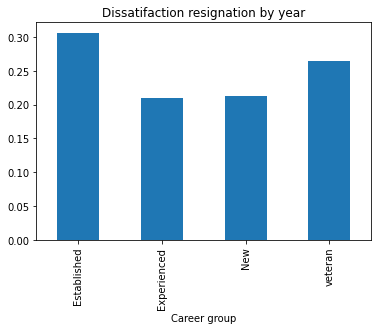

In [68]:
pivot_table_combined = resignation.pivot_table(index='Career group', values='the_dissatisfaction')
pivot_table_combined.plot(kind='bar', title='Dissatifaction resignation by year', legend=False);

In [ ]:
#It is obvious from the above graph that employers with more than 7 years experience tend to resign due to some kind of....
#dissatisfaction more than those below 7 years

In [ ]:
resignation["age"].value_counts(dropna=False)